## 3D visualization of Gradient Descent and advanced NumPy arrays
Hands-on activity with Python  
Editor: Saeid SHARIFY  
Date: 2021/08/08  

#### Imports and Packages

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

%matplotlib inline

#### Minimise // the function we use
$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$


We can also simplify representing this function to:  
$f(x, y) = \frac{1}{r +1}$ where $r$ is $3^{-x^2 - y^2}$

In [13]:
# writing the function
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)


#### Partial Derivatives
Partial Derivatives with respect to x:  
$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}} {\left( 3^{-x^2 -y^2} + 1 \right)^2}$

Partial Derivatives with respect to y:  
$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}} {\left( 3^{-x^2 -y^2} + 1 \right)^2}$




In [14]:
a, b = symbols('x, y')
print ('The cost function of f(x,y) is: ', f(a, b))
print ('Partial derivative on x is: ', diff(f(a,b), b))
print ('The value of cost at this point:', f(a, b).evalf(subs={a:1.8, b:1.0})) # Dictionnary in Python: calculating cost at this point: {a:1.8, b:1.0}

The cost function of f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative on x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
The value of cost at this point: 0.990604794032582


#### Calculating the partial derivatives with SymPy

In [15]:
# evaluating the partial derivative
diff(f(a,b),a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

#### Batch Gradient Descent

In [16]:
# setting up initial values for the parameters
multip = 0.1
max_iteration = 500
param = np.array([1.8, 1.0]) # our initial guess

for n in range(max_iteration):
    gradient_x = diff(f(a,b), a).evalf(subs={a:param[0], b:param[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:param[0], b:param[1]})
    # combining into a single numpy array
    gradients = np.array([gradient_x, gradient_y])
    param = param - multip * gradients
    
    
# outputs
print('Values of gradient array', gradients)
print('Minimim occures at x on the value of:', param[0])
print('Minimum occures at y on the value of:', param[1])
print('The cost:', f(param[0], param[1]))



Values of gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimim occures at x on the value of: 3.45838599885832e-11
Minimum occures at y on the value of: 1.92132555492129e-11
The cost: 0.500000000000000


#### Calculating the partial derivatives without using SymPy

In [17]:
# writing the function
# Partial Derivatives with respect to x:  
def fpx(x,y):
    r = 3**(-x**2 -y**2)
    return 2*x*log(3)*r / (r + 1)**2

# Partial Derivatives with respect to y:  
def fpy (x,y):
    r = 3**(-x**2 -y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [18]:
fpx(1.8, 1.0)

0.036808971619750504

#### Using the created function which is a lot faster than a SymPy loop

In [19]:
# setting up initial values for the parameters
multip = 0.1
max_iteration = 500
param = np.array([1.8, 1.0]) # our initial guess

for n in range(max_iteration):
    gradient_x = fpx(param[0], param[1])
    gradient_y = fpy(param[0], param[1])
    # combining into a single numpy array
    gradients = np.array([gradient_x, gradient_y])
    param = param - multip * gradients
    
    
# outputs
print('Values of gradient array', gradients)
print('Minimim occures at x on the value of:', param[0])
print('Minimum occures at y on the value of:', param[1])
print('The cost:', f(param[0], param[1]))



Values of gradient array [2.01013038e-11 1.11673910e-11]
Minimim occures at x on the value of: 3.458385998858304e-11
Minimum occures at y on the value of: 1.9213255549212797e-11
The cost: 0.5


#### 3D visualization of Gradient Descent and advanced NumPy arrays

In [20]:
# setting up initial values for the parameters
multip = 0.1
max_iteration = 500
param = np.array([1.8, 1.0]) # our initial guess

values_array = param.reshape(1,2)
print(values_array.shape)


for n in range(max_iteration):
    gradient_x = fpx(param[0], param[1])
    gradient_y = fpy(param[0], param[1])
    # combining into a single numpy array
    gradients = np.array([gradient_x, gradient_y])
    param = param - multip * gradients
    
    # updating values_array using append methode:
    # values_array = np.append(values_array, param.reshape(1,2), axis=0)

    # updating values_array using concatenate methode:
    values_array = np.concatenate((values_array, param.reshape(1,2)), axis=0)
    
# outputs
print('Values of gradient array', gradients)
print('Minimim occures at x on the value of:', param[0])
print('Minimum occures at y on the value of:', param[1])
print('The cost:', f(param[0], param[1]))



(1, 2)
Values of gradient array [2.01013038e-11 1.11673910e-11]
Minimim occures at x on the value of: 3.458385998858304e-11
Minimum occures at y on the value of: 1.9213255549212797e-11
The cost: 0.5


/tmp/ipykernel_14423/2067165145.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axx = viz.gca(projection='3d')


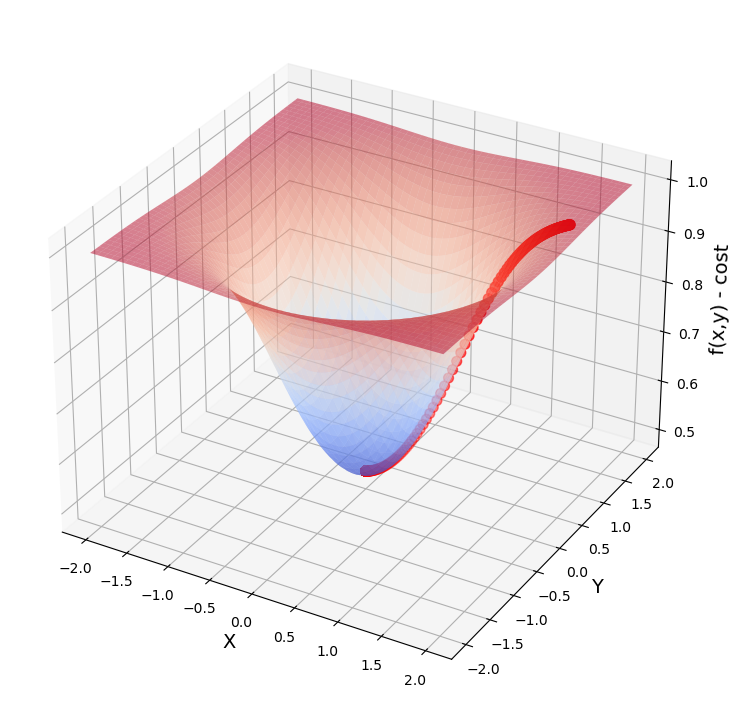

In [21]:
# 3D visualization of the gradent descent
# as usual with charts, we need to generate some data first
x_array = np.linspace(start=-2, stop=2, num=200) # type : numpy.ndarray
y_array = np.linspace(start=-2, stop=2, num=200) # type : numpy.ndarray

# the three inputs of .plot_surface(x,y,z) needs to be 2d arrays
x_array, y_array = np.meshgrid(x_array,y_array)


viz = plt.figure(figsize=[16,9])
axx = viz.gca(projection='3d')

axx.set_xlabel('X', fontsize=14)
axx.set_ylabel('Y', fontsize=14)
axx.set_zlabel('f(x,y) - cost', fontsize=14)


# adding color to the cost changes using color map cm package
axx.plot_surface(x_array, y_array, f(x_array, y_array), cmap = cm.coolwarm, alpha = 0.5)
axx.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='r')

plt.show()

## Few advanced numpy technics on N-Dimensional array

In [22]:
# few advanced numpy technics for working with multi-dimensional arrays

# 1 row and 2 columns
active_mode = np.array([['walk','scooter']]) 
print(active_mode.shape)

# 2 rows and 2 columns
passive_mode = np.array([['bus','subway'],['taxi', 'car-share']])
print(passive_mode.shape)

# selecting a particular item in the array
print('Active Mobility Modes: ', passive_mode[0])
print('Selected mode by user is: ', passive_mode[0][1])
print('The most expensive mode is: ', passive_mode[1][0])

# .append and creating a 3 by 2 array
modes = np.append(arr = passive_mode, values = active_mode, axis=0)
print('Here you have all modes: ',modes)

# take an entire column from this array
print('Printing all the rows and the first column: ', modes[:, 0]) # all the rows and first column


# add a new row with 2 columns
modes = np.append(arr=modes, values=[['gas station', 'parking']], axis=0)
print('Print the last row: \n',  modes[3, :])



(1, 2)
(2, 2)
Active Mobility Modes:  ['bus' 'subway']
Selected mode by user is:  subway
The most expensive mode is:  taxi
Here you have all modes:  [['bus' 'subway']
 ['taxi' 'car-share']
 ['walk' 'scooter']]
Printing all the rows and the first column:  ['bus' 'taxi' 'walk']
Print the last row: 
 ['gas station' 'parking']
